#Plotting Sigmoid Function



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

In [ ]:
def sigmoid(x,w,b):
  return 1/(1 + np.exp(-(w*x +b)))

In [ ]:
print(sigmoid(0.5,0.5,0.7))

0.7211151780228631


In [ ]:
w = -3 #@param {type: "slider", min: -10, max: 10}
b = -2 #@param {type: "slider", min: -5, max: 5}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)#broadcasting


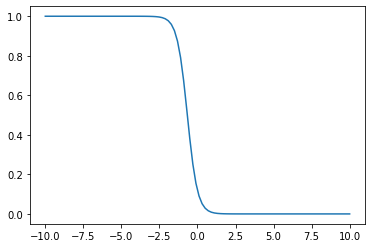

In [ ]:
plt.plot(X,Y)
plt.show()

In [ ]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1+ w2*x2 +b)))


In [ ]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [ ]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

In [ ]:
XX1, XX2 = np.meshgrid(X1, X2)

In [ ]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [ ]:
from mpl_toolkits import mplot3d

Text(0.5, 0.92, 'surface')

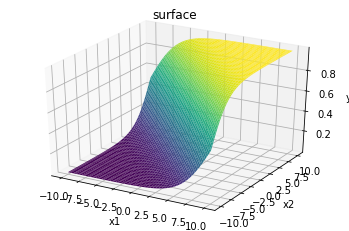

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('surface')
#ax.view_init(30, 180)

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red', 'yellow', 'green'])

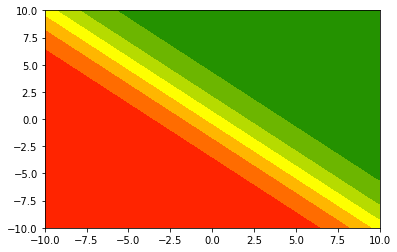

In [ ]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap)
plt.show()

In [ ]:
w_unknown = 0.8 #@param {type: "slider", min: -5, max: 5, step:0.2}
b_unknown = 1.6 #@param {type: "slider", min: -5, max: 5, step:0.2}

X = np.random.random(25) * 20 - 10
Y = sigmoid(X ,w_unknown, b_unknown)

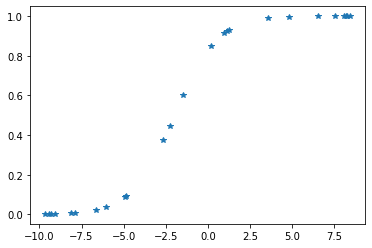

In [ ]:
plt.plot(X, Y, '*')
plt.show()

In [ ]:
w = np.linspace(-5, 5, 100)
b = np.linspace(-5, 5, 100)
WW, BB = np.meshgrid(w, b)

In [ ]:
def loss_calc(X, Y, w_est, b_est):
  loss = 0
  for x,y in zip(X, Y):
    loss = loss + (y - sigmoid(x, w_est, b_est))**2
  return loss

In [ ]:
Loss=np.zeros(WW.shape)
for i in range (WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = loss_calc(X, Y, WW[i, j], BB[i, j])

Text(0.5, 0.92, 'surface')

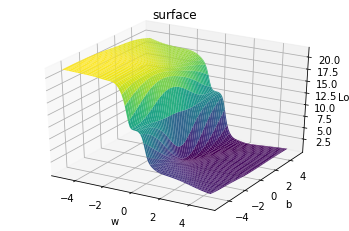

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.set_title('surface')

#ax.view_init(30, 180)

In [ ]:
ij = np.argmin(Loss)
print(ij)

6557


In [ ]:
i = int(np.floor(ij/Loss.shape[1]))

In [ ]:
j=int(ij-i*Loss.shape[1])

In [ ]:
print(i, j)

65 57


In [ ]:
print(WW[i, j],BB[i, j])

0.7575757575757578 1.5656565656565657


In [ ]:
"""X = (0.5, 2.5)
Y= (0.2, 0.9)

def f(w, b, x):
  return 1.0 / (1.0 + np.exp(-(w*x + b))

def error_1(w, b):
  err = 0.0
  for x, y in zip(X, Y):
    fx = f(w, b, x)
    err += 0.5* (fx - y) ** 2
  return err

def grad_b(w, b, x, y):
  fx = f(w, b, x)
  return (fx - y) * £x * (1 - fx)

def grad_w(w, b, x, y):
  fx = f(w, b, x)
  return (fx - y) * fx * (1 - £x) * x

def do_gradient_descent():
  w, b, eta = -2, -2, 1.0
  max_epochs = 1000
  for i in range(max_epochs):
  dw, db = 0, 0
  for x, y in zip(X, Y) :
    dw += grad_w(w, b, x, y)
    db += grad_b(w, b, x, Y)
    w = w - eta * dw
    b = b - eta * db
"""

'X = (0.5, 2.5)\nY= (0.2, 0.9)\n\ndef f(w, b, x):\n  return 1.0 / (1.0 + np.exp(-(w*x + b))\n\ndef error_1(w, b):\n  err = 0.0\n  for x, y in zip(X, Y):\n    fx = f(w, b, x)\n    err += 0.5* (fx - y) ** 2\n  return err\n\ndef grad_b(w, b, x, y):\n  fx = f(w, b, x)\n  return (fx - y) * £x * (1 - fx)\n\ndef grad_w(w, b, x, y):\n  fx = f(w, b, x)\n  return (fx - y) * fx * (1 - £x) * x\n\ndef do_gradient_descent():\n  w, b, eta = -2, -2, 1.0\n  max_epochs = 1000\n  for i in range(max_epochs):\n  dw, db = 0, 0\n  for x, y in zip(X, Y) :\n    dw += grad_w(w, b, x, y)\n    db += grad_b(w, b, x, Y)\n    w = w - eta * dw\n    b = b - eta * db\n'

#Sigmoid Class


In [ ]:
class Sigmoid_Neuron:
  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1-y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1-y_pred) 

  def fit(self, X, Y, epoch = 1, eta = 1, initialise = True, display_loss = False):
    if initialise == True :
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    if display_loss == True:
      loss={}

    for i in tqdm_notebook(range(epoch), total=epoch, unit='epoch'):
      dw, db = 0, 0
      for x, y in zip(X, Y) :
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
      self.w -= eta * dw
      self.b -= eta * db

      if display_loss == True:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)

    if display_loss == True:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()


  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
      
  





  

# Fit for Toy Data

In [ ]:
X = np.asarray([[2.5,2.5], [4,-1], [1,-4], [-3,1.25], [-2,-4], [1,5]])
Y = np.asarray([1, 1, 1, 0, 0, 0])

In [ ]:
print(X.shape, Y.shape)

(6, 2) (6,)


In [ ]:
sn=Sigmoid_Neuron()

In [ ]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY ,cmap = my_cmap)
  ax.scatter(X[:,0], X[:,1],c = Y)
  ax.plot()

In [ ]:
sn.fit(X, Y, 1, 0.25)

In [ ]:
print(sn.w, sn.b)

[[0.51115271 0.10993204]] [0.00923764]


[[0.51115271 0.10993204]] [0.00923764]
[[ 0.57348408 -0.15560331]] [-0.00185582]
[[ 0.64743127 -0.22366318]] [-0.03046534]
[[ 0.72025296 -0.23856862]] [-0.05792945]
[[ 0.78041471 -0.25861572]] [-0.0849101]
[[ 0.83388643 -0.27551685]] [-0.11096863]
[[ 0.88201448 -0.29093893]] [-0.13605394]
[[ 0.92594913 -0.30506597]] [-0.16013448]
[[ 0.96644463 -0.31812417]] [-0.18321523]
[[ 1.00404745 -0.33027346]] [-0.20532005]
[[ 1.0391688  -0.34163688]] [-0.226484]
[[ 1.07212888 -0.35231173]] [-0.24674829]
[[ 1.10318385 -0.36237685]] [-0.26615715]
[[ 1.13254319 -0.37189738]] [-0.2847557]
[[ 1.16038129 -0.380928  ]] [-0.30258864]
[[ 1.18684547 -0.38951522]] [-0.31969939]
[[ 1.21206175 -0.39769905]] [-0.33612962]
[[ 1.23613899 -0.40551422]] [-0.3519189]
[[ 1.25917209 -0.41299109]] [-0.36710458]
[[ 1.2812444  -0.42015644]] [-0.38172179]
[[ 1.30242959 -0.42703398]] [-0.39580342]
[[ 1.32279314 -0.43364483]] [-0.4093802]
[[ 1.34239358 -0.44000791]] [-0.42248083]
[[ 1.36128344 -0.44614021]] [-0.43513204]
[

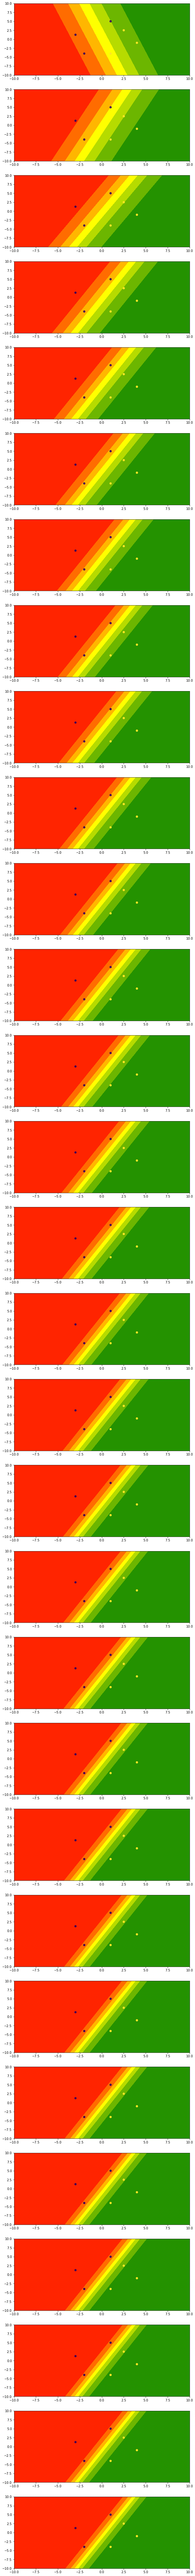

In [ ]:
N=30
plt.figure(figsize=(10, N*5))

for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i+1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.25, False)

  
  



# Load Data

In [ ]:
!wget https://www.dropbox.com/s/u8feb5uctgrux30/mobile_cleaned.csv

--2020-06-24 06:56:12--  https://www.dropbox.com/s/u8feb5uctgrux30/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u8feb5uctgrux30/mobile_cleaned.csv [following]
--2020-06-24 06:56:12--  https://www.dropbox.com/s/raw/u8feb5uctgrux30/mobile_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9df9e35d6f1a178d8ec3ad3f3d.dl.dropboxusercontent.com/cd/0/inline/A6NjWgik9q3iNXwRSgBqborcR9W3TgG85L7JL3thMVnsc1Vullegjv_CgglLynqlZw35hl_7rs1uH4Jf6cBpSuGG5oLJ-vOSBNLyIjwIK9rNUeSXQOv5RY1eQOGf8L_4g5E/file# [following]
--2020-06-24 06:56:13--  https://uc9df9e35d6f1a178d8ec3ad3f3d.dl.dropboxusercontent.com/cd/0/inline/A6NjWgik9q3iNXwRSgBqborcR9W3TgG85L7JL3thMVnsc1Vullegjv_CgglLynqlZw35hl_7rs1uH4Jf6cBpSuGG5oLJ-vOS

In [ ]:
data = pd.read_csv('mobile_cleaned.csv')

In [ ]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [ ]:
data.describe()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.0,341.000000,341.000000,341.000000,341.0,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.0,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,232.970674,344.211144,5.462317,161.343109,11.120235,1.792551,72.353343,149.946394,46.369501,3191.307918,9.592375,0.211144,0.020528,0.683284,0.085044,0.002933,0.005865,0.029326,0.035191,0.580645,0.017595,0.325513,0.002933,0.005865,0.055718,0.023460,0.0,0.014663,0.002933,0.005865,0.0,0.029326,0.011730,0.017595,0.049853,0.017595,0.008798,0.008798,0.011730,0.011730,...,0.005865,0.043988,0.011730,0.043988,0.005865,0.061584,0.002933,0.041056,0.008798,0.017595,0.011730,0.002933,0.011730,0.002933,0.129032,0.026393,0.0,0.023460,0.002933,0.002933,0.076246,0.061584,0.008798,0.011730,0.002933,0.906158,0.005865,0.005865,0.002933,0.020528,0.002933,0.055718,0.002933,0.759531,0.152493,0.085044,0.020528,0.020528,0.958944,4.072434
std,137.231746,88.161129,0.742529,22.305556,61.320855,0.451598,9.357839,9.192305,46.435453,932.533527,5.953827,0.408720,0.142006,0.465879,0.279357,0.054153,0.076471,0.168965,0.184532,0.494179,0.131668,0.469255,0.054153,0.076471,0.229714,0.151583,0.0,0.120375,0.054153,0.076471,0.0,0.168965,0.107827,0.131668,0.217962,0.131668,0.093520,0.093520,0.107827,0.107827,...,0.076471,0.205370,0.107827,0.205370,0.076471,0.240751,0.054153,0.198711,0.093520,0.131668,0.107827,0.054153,0.107827,0.054153,0.335728,0.160536,0.0,0.151583,0.054153,0.054153,0.265782,0.240751,0.093520,0.107827,0.054153,0.292037,0.076471,0.076471,0.054153,0.142006,0.054153,0.229714,0.054153,0.427996,0.360026,0.279357,0.142006,0.142006,0.198711,0.377066
min,0.000000,143.000000,2.400000,58.000000,1.000000,1.000000,23.600000,115.600000,0.000000,1020.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
X = data.drop('Rating', axis=1).values
Y = data['Rating'].values

In [ ]:
X.shape

(341, 87)

In [ ]:
Y.shape

(341,)

In [ ]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [ ]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating,Class
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4,1


In [ ]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [ ]:
Y_binarised = data['Class'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
R = np.random.random([100,1])

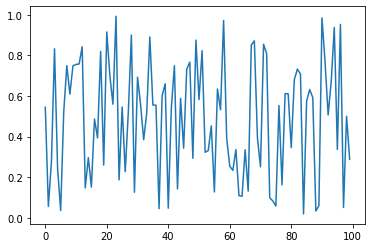

In [ ]:
plt.plot(R)
plt.show()

In [ ]:
np.mean(R)

0.48985109274288974

In [ ]:
np.std(R)

0.28048030927011813

In [ ]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
RT = scaler.transform(R)

In [ ]:
np.mean(RT)

7.882583474838611e-17

In [ ]:
np.std(RT)

0.9999999999999999

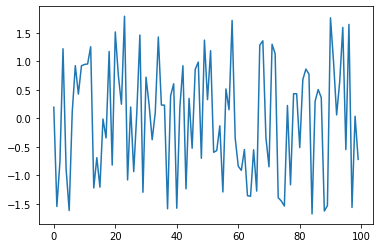

In [ ]:
plt.plot(RT)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, stratify = Y_binarised)

In [ ]:
X_train.shape

(255, 87)

In [ ]:
X_test.shape

(86, 87)

In [ ]:
scaler=StandardScaler()


In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
minmax_scaler = MinMaxScaler()

In [ ]:
Y_train_scaled = minmax_scaler.fit_transform(Y_train.reshape(-1,1))
Y_test_scaled = minmax_scaler.transform(Y_test.reshape(-1,1))

In [ ]:
print(Y_train_scaled)

[[0.68]
 [0.72]
 [0.72]
 [0.6 ]
 [0.8 ]
 [0.64]
 [0.68]
 [0.72]
 [0.64]
 [0.76]
 [0.72]
 [0.2 ]
 [0.8 ]
 [0.72]
 [0.92]
 [0.76]
 [0.6 ]
 [0.76]
 [0.84]
 [0.68]
 [0.8 ]
 [0.72]
 [0.32]
 [0.72]
 [0.36]
 [0.76]
 [0.72]
 [0.64]
 [0.72]
 [0.76]
 [0.6 ]
 [0.8 ]
 [0.24]
 [0.4 ]
 [0.68]
 [0.44]
 [0.64]
 [0.52]
 [0.68]
 [0.6 ]
 [0.6 ]
 [0.56]
 [0.64]
 [0.56]
 [0.72]
 [0.48]
 [0.68]
 [0.64]
 [0.72]
 [0.64]
 [0.72]
 [0.76]
 [0.68]
 [0.52]
 [0.6 ]
 [0.68]
 [0.76]
 [0.72]
 [0.76]
 [0.52]
 [0.56]
 [0.76]
 [0.56]
 [0.56]
 [0.68]
 [0.56]
 [0.8 ]
 [0.56]
 [0.36]
 [0.8 ]
 [0.76]
 [0.6 ]
 [0.8 ]
 [0.64]
 [0.76]
 [0.8 ]
 [0.56]
 [0.72]
 [0.76]
 [0.72]
 [0.76]
 [0.56]
 [0.6 ]
 [0.64]
 [0.6 ]
 [0.68]
 [0.56]
 [0.6 ]
 [0.2 ]
 [0.72]
 [0.72]
 [0.88]
 [0.36]
 [0.32]
 [0.4 ]
 [0.64]
 [0.52]
 [0.68]
 [1.  ]
 [0.6 ]
 [0.72]
 [0.68]
 [0.64]
 [0.64]
 [0.68]
 [0.68]
 [0.52]
 [0.76]
 [0.6 ]
 [0.48]
 [0.64]
 [0.6 ]
 [0.68]
 [0.48]
 [0.8 ]
 [0.6 ]
 [0.64]
 [0.4 ]
 [0.72]
 [0.6 ]
 [0.8 ]
 [0.56]
 [0.68]
 [0.52]
 [0.72]


In [ ]:
scaled_threshold=list(minmax_scaler.transform(np.asarray([threshold]).reshape(-1,1)))[0][0]

In [ ]:
scaled_threshold

0.6800000000000002

In [ ]:
Y_binarised_train = (Y_train_scaled >= scaled_threshold).astype('int').ravel()

In [ ]:
Y_binarised_train

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
Y_binarised_test = (Y_test_scaled >= scaled_threshold).astype('int').ravel()

#Testing on Real Data


In [ ]:
sn = Sigmoid_Neuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


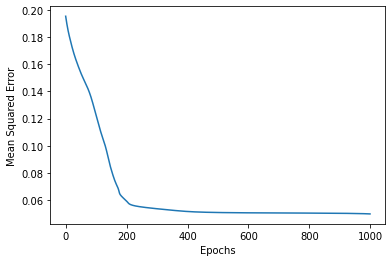

In [ ]:
sn.fit(X_train_scaled, Y_train_scaled, epoch=1000, eta=0.01, display_loss = True)

In [ ]:
Y_train_pred = sn.predict(X_train_scaled)
Y_test_pred = sn.predict(X_test_scaled)


In [ ]:
Y_train_pred_scaled = (Y_train_pred >= scaled_threshold).astype('int').ravel()
Y_test_pred_scaled = (Y_test_pred >= scaled_threshold).astype('int').ravel()

In [ ]:
accuracy_train = accuracy_score(Y_train_pred_scaled, Y_binarised_train)
accuracy_test = accuracy_score(Y_test_pred_scaled, Y_binarised_test)

In [ ]:
print(accuracy_train, accuracy_test)

0.7294117647058823 0.7558139534883721
